In [1064]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

plt.style.use('ggplot')

pd.__version__

u'0.17.0'

In [1065]:
SSF_subsidies = pd.read_csv("SSFsubsidiesnonfuel.csv")
countries = pd.read_csv("Country_Data.csv")
catch = pd.read_csv("SAU_Catches.csv")
type_EEZ = pd.read_csv("Subtype_Fleet_EEZ.csv")
all_subsidies = pd.read_csv("subsidies2009_nofuel.csv")

In [1066]:
SSF_subsidies.columns.values

array(['ID', 'Cnumber', 'RegionID', 'RegionName', 'Type', 'SubType',
       'Category', 'Category_ABC', 'ReEst_Subsidy2009', 'NewData',
       'Developed', 'HDI_2005', 'Countries',
       'SSFsubsidies_assessed_percent', 'weighted_by_sectorsize',
       'Data_group', 'SSF_totalCatch_EEZ_percent',
       'SSF_totalCatch_Country_percent', 'SSF_USD_1000'], dtype=object)

In [1067]:
subsidies_type = pd.merge(left=all_subsidies,right=type_EEZ, how='left')

In [1068]:
subsidies_type_countries = pd.merge(left=subsidies_type,right=countries, how='left')

In [1069]:
subsidies_type_countries_catch = pd.merge(left=subsidies_type_countries,right=catch, how='left')

In [1070]:
catch_countries = pd.merge(left=catch, right=countries, how='left')

In [1071]:
catch_by_subregion = catch_countries.groupby(['Subregion']).sum()

In [1072]:
catch_by_subregion['mean_catch'] = (catch_by_subregion['SSF_Catch']/catch_by_subregion['Total_Catch'])*100

In [1073]:
catch_by_subregion = catch_by_subregion.reset_index()

In [1074]:
mean_catch = catch_by_subregion.loc[:,['Subregion','mean_catch']]

In [1075]:
subsidies_type_countries_catch_meancatch = pd.merge(left=subsidies_type_countries_catch,right=mean_catch, how='left')

In [1076]:
SSF_subsidies_countries = pd.merge(left=SSF_subsidies,right=countries, how='left')

In [1077]:
SSF_by_subregion = SSF_subsidies_countries.groupby(['Subregion','Type']).sum()

In [1078]:
SSF_by_region = SSF_subsidies_countries.groupby(['RegionName','Type']).sum()
SSF_by_region['mean_subsidies_region'] = (SSF_by_region['SSF_USD_1000']/SSF_by_region['ReEst_Subsidy2009'])*100
SSF_by_region = SSF_by_region.reset_index()
mean_SSFsubsidies_region = SSF_by_region.loc[:,['RegionName','Type','mean_subsidies_region']]


In [1079]:
SSF_by_subregion['mean_subsidies_subregion'] = (SSF_by_subregion['SSF_USD_1000']/SSF_by_subregion['ReEst_Subsidy2009'])*100

In [1080]:
SSF_by_subregion = SSF_by_subregion.reset_index()

In [1081]:
mean_SSFsubsidies_subregion = SSF_by_subregion.loc[:,['Subregion','Type','mean_subsidies_subregion']]

In [1082]:
subsidies_type_countries_catch_meancatch_meanSSFsubsidies = pd.merge(left=subsidies_type_countries_catch_meancatch,right=mean_SSFsubsidies_subregion, how='left')

subsidies_type_countries_catch_meancatch_meanSSFsubsidies_regions = pd.merge(left=subsidies_type_countries_catch_meancatch_meanSSFsubsidies,right=mean_SSFsubsidies_region, how='left')

subsidies_type_countries_catch_meancatch_meanSSFsubsidies_regions.to_csv('subsidies_type_countries_catch_meancatch_meanSSFsubsidies_regions.csv')
#updated csv file and filled gaps from mean subsidies subregion with data from mean subsidies region new csv file named:subsidies_meanSSF_type_subregion_new


In [1083]:
meanSSFsubsidies_type_subregion = pd.read_csv("subsidies_meanSSF_type_subregion_new.csv")

In [1084]:
np.sum(meanSSFsubsidies_type_subregion['ReEst_Subsidy2009_original'])

27801451.645998884

In [1085]:
meanSSFsubsidies_type_subregion['Factor'] = meanSSFsubsidies_type_subregion['SSF_Catch_percent']/meanSSFsubsidies_type_subregion['mean_catch']


In [1086]:
meanSSFsubsidies_type_subregion['SSF_subsidies_estimates'] = meanSSFsubsidies_type_subregion['Factor']*meanSSFsubsidies_type_subregion['mean_subsidies_subregion']

In [1087]:
SSF_subsidies_short = SSF_subsidies_countries.loc[:,['Countries','Type','SSFsubsidies_assessed_percent','weighted_by_sectorsize','Data_group','SSF_USD_1000']]

In [1088]:
SSF_subsidies_estimates_assessed = pd.merge(left=meanSSFsubsidies_type_subregion,right=SSF_subsidies_short,how='left')

In [1089]:
SSF_subsidies_estimates_assessed['SSF_subsidies_percent'] = SSF_subsidies_estimates_assessed['SSFsubsidies_assessed_percent'].fillna(SSF_subsidies_estimates_assessed['SSF_subsidies_estimates'])

In [1090]:
SSF_subsidies_estimates_assessed['SSF_subsidies_USD'] = (SSF_subsidies_estimates_assessed['ReEst_Subsidy2009_original']/100)*SSF_subsidies_estimates_assessed['SSF_subsidies_percent']

In [1091]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])

5170980.8536213078

In [1092]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])/np.sum(subsidies_type_countries_catch_meancatch_meanSSFsubsidies['ReEst_Subsidy2009_original'])*100

18.599679324175355

In [1093]:
np.sum(SSF_subsidies_estimates_assessed['SSF_subsidies_USD'])

5170980.8536213078

In [1094]:
SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.replace(to_replace='South, Central America and Carribbean',value='S and C America')

In [1095]:
SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.rename(columns={'ReEst_Subsidy2009_original': 'total subsidies', 'SSF_subsidies_USD': 'SSF subsidies'})

In [1096]:
SSF_subsidies_estimates_assessed['LSF subsidies'] = SSF_subsidies_estimates_assessed['total subsidies']-SSF_subsidies_estimates_assessed['SSF subsidies']

In [1097]:
SSF_subsidies_estimates_assessed.iloc[60:100]

,ID,Cnumber,RegionID,RegionName,Countries,Type,SubType,Category,total subsidies,NewData,...,mean_subsidies_subregion,Factor,SSF_subsidies_estimates,SSFsubsidies_assessed_percent,weighted_by_sectorsize,Data_group,SSF_USD_1000,SSF_subsidies_percent,SSF subsidies,LSF subsidies
60,66,36,5,Oceania,Australia,A1,Fisheries mangt.,Beneficial,61780.418491,0,...,16.578444,0.982318,16.285300,19.461492,TRUE,3,12023.391151,19.461492,12023.391151,49757.027339
61,67,36,5,Oceania,Australia,A2,Fishery R&D,Beneficial,9922.318280,0,...,17.146119,0.982318,16.842937,17.146119,TRUE,3,1701.292472,17.146119,1701.292472,8221.025808
62,68,36,5,Oceania,Australia,A3,MPAs,Beneficial,72077.407561,1,...,18.949043,0.982318,18.613981,19.461492,TRUE,3,14027.338847,19.461492,14027.338847,58050.068714
63,69,36,5,Oceania,Australia,B1,Boat constsruct. & renov.,Capacity-enhancing,89014.750271,0,...,17.146119,1.113140,19.086038,17.146119,TRUE,3,15262.574761,17.146119,15262.574761,73752.175509
64,70,36,5,Oceania,Australia,B2,Fisheries dev. projects,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,71,36,5,Oceania,Australia,B3,Fishing port develop.,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,72,36,5,Oceania,Australia,B4,Markt. & storage infrast.,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,73,36,5,Oceania,Australia,B5,Tax exemption,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,74,36,5,Oceania,Australia,B6,Fishing access,Capacity-enhancing,0.000000,0,...,NaN,1.113140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,76,36,5,Oceania,Australia,C1,Fisher assistance,Ambiguous,28262.262712,0,...,100.000000,1.113140,111.314046,100.000000,TRUE,2,28262.262712,100.000000,28262.262712,0.000000


In [1098]:
SSF_subsidies_subregions = SSF_subsidies_estimates_assessed.groupby(['Subregion']).sum()

In [1099]:
SSF_subsidies_subregions['SSF_bySubregion_percent'] = SSF_subsidies_subregions['SSF subsidies']/SSF_subsidies_subregions['total subsidies']*100

In [1100]:
SSF_subsidies_subregions1 = SSF_subsidies_subregions.loc[:,['LSF subsidies','SSF subsidies']]

In [1101]:
SSF_subsidies_subregions1

,LSF subsidies,SSF subsidies
Subregion,,
Australia and New Zealand,423180.168465,81707.153956
Caribbean,28274.781687,79129.473920
Central America,158395.014131,82805.197792
Eastern Africa,20444.854430,22593.412728
Eastern Asia,6280863.609366,1775072.002683
Eastern Europe,1672235.093382,96149.220373
Melanesia,702665.906685,17691.529726
Micronesia,1968515.877485,42264.556679
Middle Africa,81068.041156,64681.593044


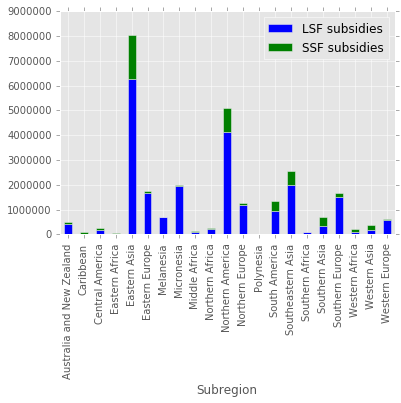

In [1102]:
SSF_subsidies_subregions1.plot(kind='bar', stacked=True)

In [1103]:
SSF_subsidies_regions = SSF_subsidies_estimates_assessed.groupby(['RegionName']).sum()

In [1104]:
SSF_subsidies_regions1 = SSF_subsidies_regions.loc[:,['RegionName','total subsidies','SSF subsidies']]

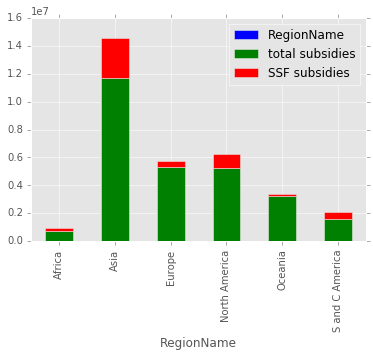

In [1105]:
SSF_subsidies_regions1.plot(kind='bar', stacked=True)

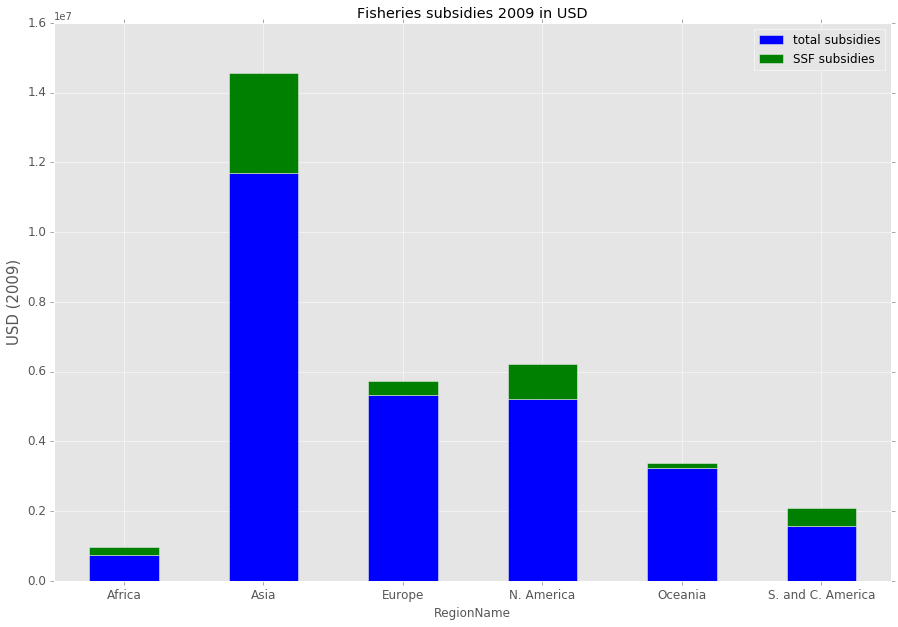

In [1106]:
ax = SSF_subsidies_regions[['total subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies 2009 in USD",stacked = True, figsize=(15,10),legend=True, fontsize=12)

ax.set_ylabel("USD (2009)",fontsize=15)
labels=ax.set_xticklabels(['Africa','Asia','Europe','N. America','Oceania','S. and C. America'],rotation=360)

plt.show()

In [1107]:
SSF_subsidies_regions = SSF_subsidies_regions.sort_values(by=['total subsidies'],ascending=False)

In [1108]:
SSF_subsidies_regions['SSF percent per region'] = SSF_subsidies_regions['SSF subsidies']/SSF_subsidies_regions['total subsidies']*100

In [1109]:
SSF_subsidies_regions['SSF percent per region']

RegionName
Asia               24.483551
Europe              7.798976
North America      19.120420
Oceania             4.403143
S and C America    32.457499
Africa             32.492364
Name: SSF percent per region, dtype: float64

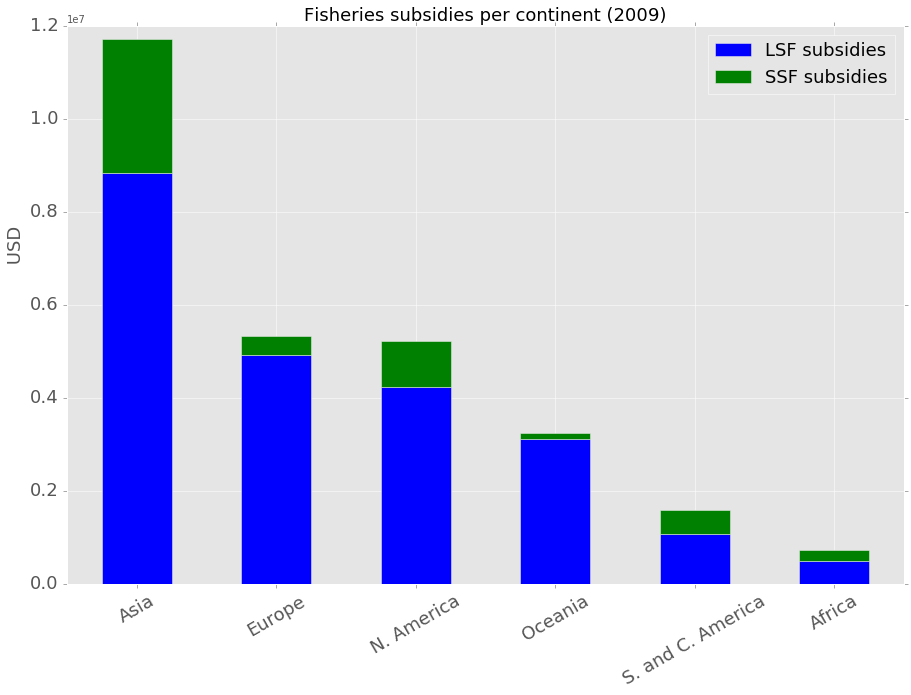

In [1110]:
ax = SSF_subsidies_regions[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies per continent in 2009 USD", figsize=(15,10),stacked=True, legend=True, fontsize=18)
ax.set_ylabel("                     USD",fontsize=18)
ax.set_xlabel(" ")
ax.set_title("Fisheries subsidies per continent (2009)", fontsize=18)
plt.legend(loc='best',fontsize=18)
labels=ax.set_xticklabels(['Asia','Europe','N. America','Oceania','S. and C. America','Africa'],rotation=30)
plt.savefig('Subsidies_Continents.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Continents.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [1111]:
Subsidies_per_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType']).sum()

In [1112]:
Subsidies_per_subtype = Subsidies_per_subtype.sort_values(by=['total subsidies'],ascending=False)

In [1113]:
Subsidies_per_subtype['SSF subsidies']

SubType
Fisheries mangt.             1837338.459298
Fishing port develop.         722485.905590
Boat constsruct. & renov.     502669.475073
Fishery R&D                   589114.252459
Markt. & storage infrast.     191138.732970
Vessel buyback                  3483.168888
Fisher assistance             479577.000697
MPAs                          271453.286690
Tax exemption                 147437.441889
Fisheries dev. projects       276835.389715
Fishing access                  2772.689895
Rural fisher communities      146675.050456
Name: SSF subsidies, dtype: float64

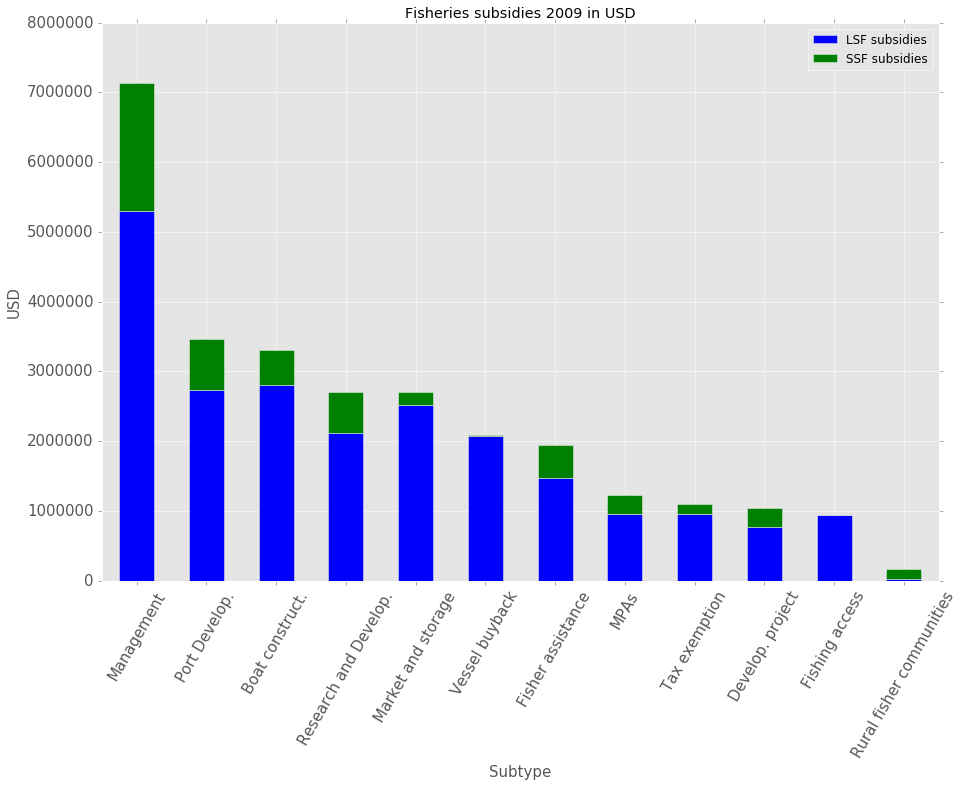

In [1114]:
ax = Subsidies_per_subtype[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies 2009 in USD", figsize=(15,10),stacked=True, legend=True, fontsize=15)
ax.set_ylabel("USD",fontsize=15)
ax.set_xlabel("Subtype",fontsize=15)
labels=ax.set_xticklabels(['Management','Port Develop.','Boat construct.','Research and Develop.','Market and storage','Vessel buyback','Fisher assistance','MPAs','Tax exemption','Develop. project','Fishing access','Rural fisher communities'],rotation=60)
plt.show()

In [1115]:
Subsidies_category_subtype = SSF_subsidies_estimates_assessed.groupby(['Category','SubType']).sum()

In [1116]:
Subsidies_category_subtype = Subsidies_category_subtype.loc[:,['LSF subsidies','SSF subsidies']]

In [1117]:
Subsidies_category_subtype_transposed = Subsidies_category_subtype.transpose()

In [1118]:
Subsidies_category_subtype_transposed

Category              Ambiguous                                           \
SubType       Fisher assistance Rural fisher communities  Vessel buyback   
LSF subsidies    1462834.668909             16862.402828  2076166.209883   
SSF subsidies     479577.000697            146675.050456     3483.168888   

Category            Beneficial                                 \
SubType       Fisheries mangt.     Fishery R&D           MPAs   
LSF subsidies   5300138.745731  2119305.417225  957493.158747   
SSF subsidies   1837338.459298   589114.252459  271453.286690   

Category             Capacity-enhancing                          \
SubType       Boat constsruct. & renov. Fisheries dev. projects   
LSF subsidies            2796040.586633           768472.090345   
SSF subsidies             502669.475073           276835.389715   

Category                                                                      \
SubType       Fishing access Fishing port develop. Markt. & storage infrast.   
LSF subsidies  934505.963324        2737663.163158            2513029.586158   
SSF subsidies    2772.689895         722485.905590             191138.732970   

Category                      
SubType        Tax exemption  
LSF subsidies  947958.799436  
SSF subsidies  147437.441889

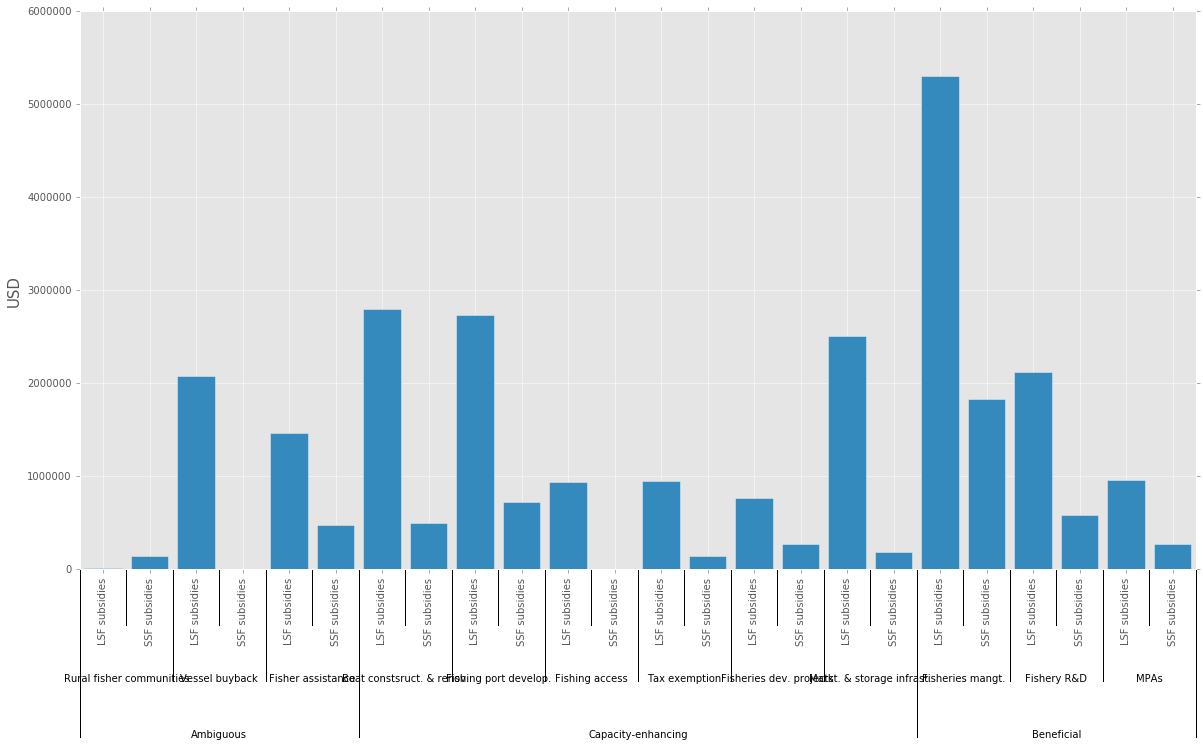

In [1119]:
# source: sam clarke
def transform_group_data(data):
    '''
    Funtion for creating a three-level dict 
    from a two-level dict with two-tuple as key.
    '''
    transformed_data = {}
    for k, v in data.items():
        if k[0] in transformed_data.keys():
            transformed_data[k[0]][k[1]] = v
        else:
            transformed_data[k[0]] = {k[1]: v}
    return transformed_data
    
    
# source:  http://stackoverflow.com/questions/19184484/how-to-add-group-labels-for-bar-charts-in-matplotlib
def mk_groups(data):
    try:
        newdata = data.items()
    except:
        return

    thisgroup = []
    groups = []
    for key, value in newdata:
        newgroups = mk_groups(value)
        if newgroups is None:
            thisgroup.append((key, value))
        else:
            thisgroup.append((key, len(newgroups[-1])))
            if groups:
                groups = [g + n for n, g in zip(newgroups, groups)]
            else:
                groups = newgroups
    return [thisgroup] + groups

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_group_bar(ax, data):
    groups = mk_groups(data)
    xy = groups.pop()
    x, y = zip(*xy)
    ly = len(y)
    xticks = range(1, ly + 1)

    ax.bar(xticks, y, align='center')
    ax.set_xticks(xticks)
    ax.set_xticklabels(x, rotation=90)
    ax.set_xlim(.5, ly + .5)
    ax.yaxis.grid(True)

    scale = 1. / ly
    for pos in xrange(ly + 1):
        add_line(ax, pos * scale, -.1)
    ypos = -.2
    while groups:
        group = groups.pop()
        pos = 0
        for label, rpos in group:
            lxpos = (pos + .5 * rpos) * scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos * scale, ypos)
            pos += rpos
        add_line(ax, pos * scale, ypos)
        ypos -= .1
        
# group the data        
group_data = Subsidies_category_subtype_transposed.to_dict()

# transform the data from two-level three-level dict
transformed_data = transform_group_data(group_data)

# configure plot
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(1,1,1)


# plot
label_group_bar(ax, transformed_data)


# not sure what this does.... 
# fig.subplots_adjust(bottom=0.3)

# TODO: rotate label axis!
ax.set_ylabel("USD",fontsize=15)



In [1120]:
transformed_data

{'Ambiguous': {'Fisher assistance': {'LSF subsidies': 1462834.6689091704,
   'SSF subsidies': 479577.00069680769},
  'Rural fisher communities': {'LSF subsidies': 16862.402828224982,
   'SSF subsidies': 146675.05045552339},
  'Vessel buyback': {'LSF subsidies': 2076166.2098825513,
   'SSF subsidies': 3483.168888039203}},
 'Beneficial': {'Fisheries mangt.': {'LSF subsidies': 5300138.7457305184,
   'SSF subsidies': 1837338.4592983413},
  'Fishery R&D': {'LSF subsidies': 2119305.4172250559,
   'SSF subsidies': 589114.25245910196},
  'MPAs': {'LSF subsidies': 957493.15874698199,
   'SSF subsidies': 271453.28669010912}},
 'Capacity-enhancing': {'Boat constsruct. & renov.': {'LSF subsidies': 2796040.5866333144,
   'SSF subsidies': 502669.47507330606},
  'Fisheries dev. projects': {'LSF subsidies': 768472.09034489247,
   'SSF subsidies': 276835.38971546746},
  'Fishing access': {'LSF subsidies': 934505.96332416462,
   'SSF subsidies': 2772.6898951235075},
  'Fishing port develop.': {'LSF subs

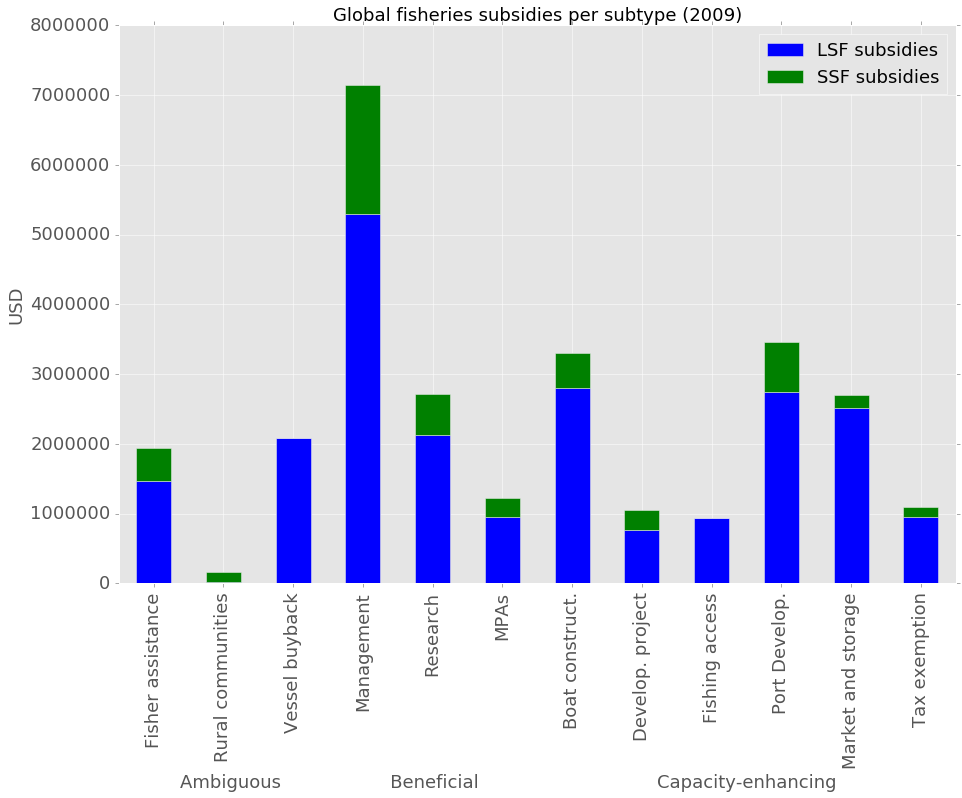

In [1121]:
fig = plt.figure()
ax = Subsidies_category_subtype[['LSF subsidies','SSF subsidies']].plot(kind='bar',title ="Fisheries subsidies per category in 2009 USD", figsize=(15,10),stacked=True, legend=True, fontsize=18)
ax.set_ylabel("USD",fontsize=18)
ax.set_xlabel("Ambiguous                   Beneficial                               Capacity-enhancing          ",fontsize=18,)
ax.set_title("Global fisheries subsidies per subtype (2009)", fontsize=18)
labels=ax.set_xticklabels(['Fisher assistance','Rural communities','Vessel buyback', 'Management', 'Research', 'MPAs', 'Boat construct.', 'Develop. project', 'Fishing access', 'Port Develop.', 'Market and storage', 'Tax exemption'],rotation=90)
plt.legend(loc='best',fontsize=18)
plt.savefig('Subsidies_Type.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Type.pdf', dpi=400, bbox_inches='tight')
plt.show()


In [1122]:
Subsidies_category_subtype.sort_values(by=['LSF subsidies'],ascending=False)

LSF subsidies   SSF subsidies
Category           SubType                                                  
Beneficial         Fisheries mangt.           5300138.745731  1837338.459298
Capacity-enhancing Boat constsruct. & renov.  2796040.586633   502669.475073
                   Fishing port develop.      2737663.163158   722485.905590
                   Markt. & storage infrast.  2513029.586158   191138.732970
Beneficial         Fishery R&D                2119305.417225   589114.252459
Ambiguous          Vessel buyback             2076166.209883     3483.168888
                   Fisher assistance          1462834.668909   479577.000697
Beneficial         MPAs                        957493.158747   271453.286690
Capacity-enhancing Tax exemption               947958.799436   147437.441889
                   Fishing access              934505.963324     2772.689895
                   Fisheries dev. projects     768472.090345   276835.389715
Ambiguous          Rural fisher communities     16862.402828   146675.050456

In [1123]:
Subsidies_per_Category = SSF_subsidies_estimates_assessed.groupby(['Category']).sum()

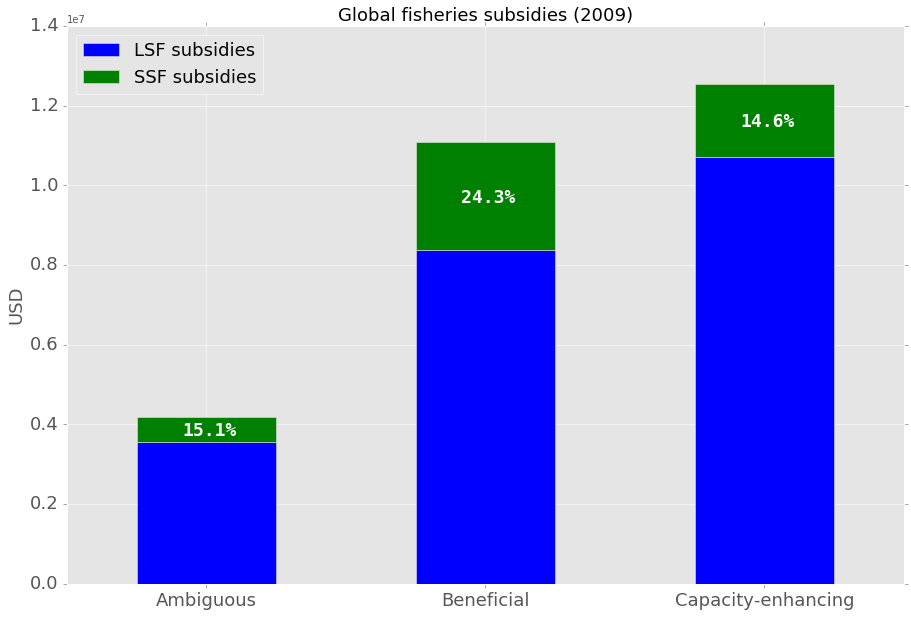

In [1124]:
data = Subsidies_per_Category[['LSF subsidies','SSF subsidies']]
data_dict = data.to_dict()


# where do these percentages come from?
SSFpercent = (
    {'label': 'Ambiguous', 'percentage': 15.1}, 
    {'label': 'Beneficial', 'percentage': 24.3},
    {'label': 'Capacity-enhancing', 'percentage': 14.6}
)

# add totals to SFFpercent
for key, val in data_dict.items():
    for k, v in data_dict[key].items():
        for i in SSFpercent:
            if i['label'] == k:
                if 'total' in i.keys():
                    i['total'] += v
                else:
                    i['total'] = v

# print("data_dict {}".format(data_dict))


# create subplot
ax = data.plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18)
ax.set_title("Global fisheries subsidies (2009)", fontsize=18)
ax.set_ylabel("USD",fontsize=18)
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Ambiguous','Beneficial', 'Capacity-enhancing'],rotation=360, fontsize=18)

# get an ordered list of percentages
percentages = []
for item in SSFpercent:
    for k, v in item.items():
        if k == 'percentage':
            percentages.append(v)

# prepare rects
N = len(SSFpercent)
indexes = np.arange(N)
width = 0.02
rects = ax.bar(indexes, percentages, width)

# iterate rects and map index with SSF percentage
for index, rect in enumerate(rects):
    SSFpercent[index]['rect_x'] = rect.get_x() 


# now we have a single object holding 
# all the values we need to label the chart 
for bar in SSFpercent:
    #  get percenatage label as a string
    percentage = bar['percentage']
    #  get value of to of bar
    height = bar['total']
    label_position = height - ((height / 100 * percentage) / 2)
    #  position text lables
    ax.text(
        bar['rect_x'] + width/2,
        label_position  - 11**5, str(percentage) + '%',
        ha="center",
        family="monospace",
        fontsize=18,
        fontweight="bold",
        color="white"
    )


plt.savefig('Subsidies_Category.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Category.pdf', dpi=400, bbox_inches='tight')
plt.legend(loc=2,fontsize=18)
plt.show()

In [1125]:
Subsidies_per_Category['percent SSF Category'] = Subsidies_per_Category['SSF subsidies']/Subsidies_per_Category['total subsidies']*100

In [1126]:
Subsidies_per_Category['percent SSF Category']

Category
Ambiguous             15.045285
Beneficial            24.360670
Capacity-enhancing    14.698494
Name: percent SSF Category, dtype: float64

In [1127]:
SSF_subsidies_subregions

,ID,Cnumber,RegionID,total subsidies,NewData,HDI_2005,EEZ,CID,CLon,CLat,...,mean_subsidies_subregion,Factor,SSF_subsidies_estimates,SSFsubsidies_assessed_percent,Data_group,SSF_USD_1000,SSF_subsidies_percent,SSF subsidies,LSF subsidies,SSF_bySubregion_percent
Subregion,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,16230,7080,120,504887.322421,2,22.860,6,1248,3664.081188,-822.901812,...,205.347211,26.813140,210.484423,201.091578,23,81707.153956,201.091578,81707.153956,423180.168465,16.183245
Caribbean,126321,54492,624,107404.255607,8,64.980,39,9924,-10411.643976,2585.458752,...,5264.958667,136.459782,4585.211350,861.992717,21,35156.905381,4406.622791,79129.473920,28274.781687,73.674431
Central America,77712,33444,408,241200.211922,7,73.188,24,5820,-8474.924676,1362.099468,...,1592.844826,105.917630,1989.262549,654.152240,53,62655.062057,2174.688314,82805.197792,158395.014131,34.330483
Eastern Africa,129666,55428,360,43038.267158,6,64.752,30,9732,5297.300544,-533.793996,...,2688.072260,121.284860,2733.704384,1105.709852,41,16090.738735,2829.561671,22593.412728,20444.854430,52.496102
Eastern Asia,52746,22404,144,8055935.612048,6,43.188,18,5232,8780.757600,2337.849348,...,891.035653,78.556906,802.568140,649.596110,96,1765444.503787,790.446396,1775072.002683,6280863.609366,22.034337
Eastern Europe,78405,33660,60,1768384.313755,22,39.540,15,5952,2341.348656,3017.813520,...,468.453302,43.322447,425.735044,501.209243,81,95764.050716,534.344643,96149.220373,1672235.093382,5.437122
Melanesia,41040,17736,240,720357.436411,5,17.232,12,5040,7790.077584,-588.252408,...,138.155434,88.035180,255.776516,90.737416,29,16035.132832,295.759621,17691.529726,702665.906685,2.455938
Micronesia,71697,30816,300,2010780.434164,0,31.296,15,5388,5682.529488,273.909156,...,185.620437,353.074663,1034.011535,38.844087,14,38256.995231,906.102130,42264.556679,1968515.877485,2.101898
Middle Africa,45651,20064,252,145749.634201,7,19.860,21,3312,1153.914612,-141.653880,...,1839.260304,115.132685,2122.840390,1129.303783,39,63123.326237,2092.559551,64681.593044,81068.041156,44.378563


In [1128]:
SSF_subsidies_subregions1 =  SSF_subsidies_subregions1.sort_values('LSF subsidies', ascending=False)

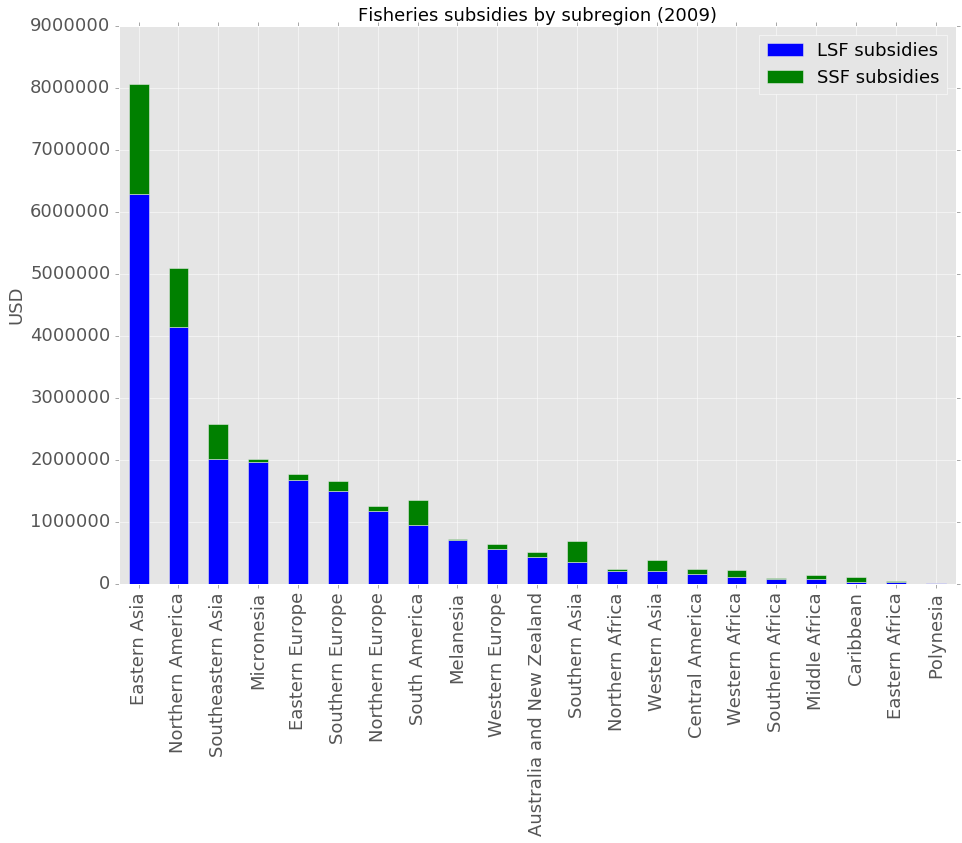

In [1129]:
ax = SSF_subsidies_subregions1.plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18)
SSF_subsidies_subregions1['total subsidies'] = SSF_subsidies_subregions1['LSF subsidies'] + SSF_subsidies_subregions1['SSF subsidies']
SSF_subsidies_subregions1['total subsidies'] = SSF_subsidies_subregions1['LSF subsidies'] + SSF_subsidies_subregions1['SSF subsidies']

ax.set_title("Fisheries subsidies by subregion (2009)", fontsize=18)
ax.set_ylabel("USD",fontsize=18)
ax.set_xlabel("",fontsize=18)


plt.legend(loc='best',fontsize=18)
plt.show()